In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import sys

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
N4 = [(0, -1), (0, 1), (-1, 0), (1, 0)]
N8 = [(-1, -1), (0, -1), (1, -1),
      (-1,  0),          (1,  0),
      (-1,  1), (0,  1), (1,  1)]

BG = 0
OBJ = 255

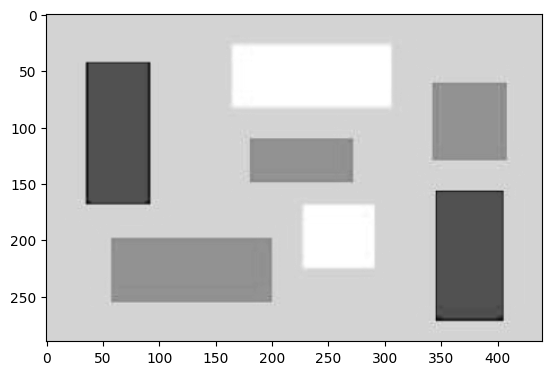

In [5]:
img = cv.imread("/content/drive/MyDrive/ABR/BEP/KakaoTalk_20230111_100314605.png", cv.IMREAD_GRAYSCALE)
plt.imshow(img, 'gray')

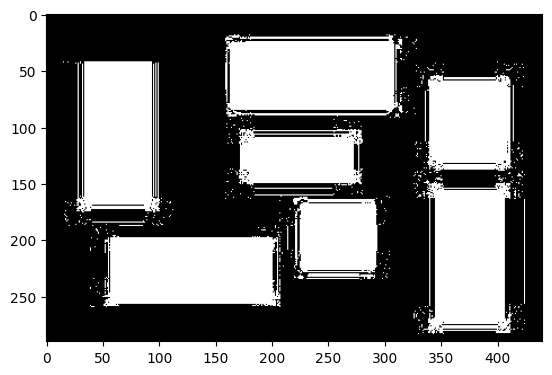

In [6]:
img = cv.imread("/content/drive/MyDrive/ABR/BEP/KakaoTalk_20230111_100314605.png", cv.IMREAD_GRAYSCALE)
q, w = img.shape
for i in range(q):
    for j in range(w):
        if img[i][j] == 217:
            img[i][j] = BG
        else:
            img[i][j] = OBJ
plt.imshow(img,'gray')

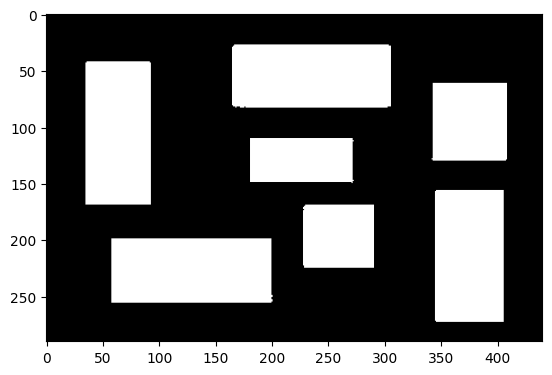

In [10]:
img = cv.imread("/content/drive/MyDrive/ABR/BEP/KakaoTalk_20230111_100314605.png", cv.IMREAD_GRAYSCALE)
# _, img = cv.threshold(img, 200, 255, cv.THRESH_BINARY)
q, w = img.shape
for i in range(q):
    for j in range(w):
        if img[i][j] <= 230 and img[i][j] >= 200:
            img[i][j] = BG
        else:
            img[i][j] = OBJ
plt.imshow(img,'gray')

In [11]:
class Node():
    def __init__(self):
        self.visit = False
        self.edge = []

    def add_edge(self, node):
        self.edge.append(node)


class GrassFire():

    def __init__(self, img, orient=N8):
        self.img = img
        self.nodes = []
        self.orient = orient

    def labeling(self, point, label):
        self.img[point] = label
        check = 0
        for o in self.orient:
            # adjacent node
            ad_node = tuple(np.array(point) + np.array(o))
            if self.img[ad_node] == OBJ and self.img[ad_node] != label:
                self.nodes.append(Node())
                self.nodes[-1].add_edge(ad_node)
                check = 1
        if check == 0 and len(self.nodes[-1].edge) != 0:
            self.nodes[-1].edge.pop()

    def searching(self, point, label):
        self.labeling(point, label)
        while True:
            point = self.nodes[-1].edge[-1]
            self.labeling(point, label)
            if len(self.nodes[-1].edge) == 0: self.nodes.pop()
            if len(self.nodes) == 0 : break

    def fire(self):
        h, w = self.img.shape
        label = 40
        for y in range(h):
            for x in range(w):
                point = (y, x)
                if self.img[point] == OBJ and self.img[point] != BG:
                    self.searching(point, label)
                    label += 30

def main():
    GF = GrassFire(img, N4)
    GF.fire()
    plt.imshow(GF.img, 'gray')

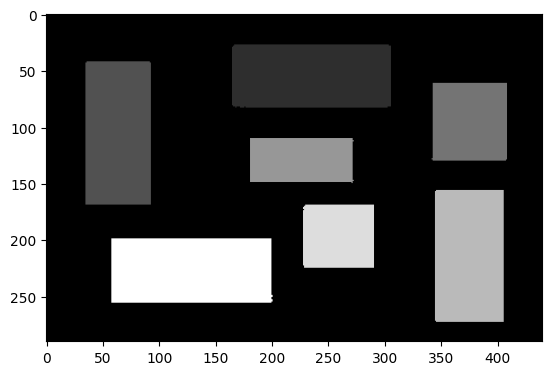

In [12]:
main()